# Suite du projet de deploiement d'une application BI et ML:
Approche Business Intelligence et Machine Learning pour alimenter les cadres de prise de décision d’une institution. Cas d’usage d’une Combinaison SQL Server, Power BI et Python pour analyser des tendances et prédire des comportements clients d’une Société au Mali.
Il s'agira ici d'apprecier le meilleur model possible autour des comportements entreprises suite à une segmentation client generée dans Power BI

## Chargement des librairies courantes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## importation des données 

In [4]:
url = "https://gitlab.com/Hamayaag/suiteprojetfinformationhamaya/-/raw/master/Data.csv"
data = pd.read_csv(url)
data.head()

,NumeroFacture,Qte,PrixUnit,MontantVentes,PoidsNet,Clients,Performance,Produits,Cout,Groupes,...,Status,SecteurActivites,Ville,PersonneV,GenrePv,Superviseur,GenreSup,Manager,GenreMger,Equipe
0,1492762,6,8.83,52.98,0.60,Entreprise1838,Bon,Produit1656,6.073152,Épices,...,A,Distributeurs Lv2,Bougouni,Agaichatou MAIGA,Femme,Aissata COULIBALY,Femme,Idrissa DAFF,Homme,Distributeurs
1,1492762,6,4.44,26.64,5.40,Entreprise1838,Bon,Produit1674,3.188543,Dosettes de café,...,A,Distributeurs Lv2,Bougouni,Agaichatou MAIGA,Femme,Aissata COULIBALY,Femme,Idrissa DAFF,Homme,Distributeurs
2,1492762,10,0.96,9.60,1.92,Entreprise1838,Bon,Produit1340,0.629295,Levure,...,A,Distributeurs Lv2,Bougouni,Agaichatou MAIGA,Femme,Aissata COULIBALY,Femme,Idrissa DAFF,Homme,Distributeurs
3,1492719,6,2.92,17.52,1.26,Entreprise1834,Bon,Produit1665,1.915015,Pop corn,...,A,Distributeurs Lv2,Bougouni,Agaichatou MAIGA,Femme,Aissata COULIBALY,Femme,Idrissa DAFF,Homme,Distributeurs
4,1492719,6,2.81,16.86,1.40,Entreprise1834,Bon,Produit1680,1.844057,Pop corn,...,A,Distributeurs Lv2,Bougouni,Agaichatou MAIGA,Femme,Aissata COULIBALY,Femme,Idrissa DAFF,Homme,Distributeurs


In [5]:
data.shape

(260096, 21)

## Exploratory Data Analysis

### Objectif :
- Comprendre du mieux possible nos données
- Développer une premiere stratégie de modélisation 

### Analyse de Forme :
- **Affichage des columns** : ['NumeroFacture', 'Qte', 'PrixUnit', 'MontantVentes', 'PoidsNet',
       'Clients', 'Performance', 'Produits', 'Cout', 'Groupes', 'Categories',
       'Status', 'SecteurActivites', 'Ville', 'PersonneV', 'GenrePv',
       'Superviseur', 'GenreSup', 'Manager', 'GenreMger', 'Equipe']
- **variable target** : performance (niveau de performance des entreprises fonction du %Marge Brut determiné en 3 classes: Bon, Median, Mauvais)
- **lignes et colonnes** : 260096 et 21
- **types de variables** : qualitatives 16 et quantitative 5
- **Analyse des valeurs manquantes** : pas de valeur manquante dans les données

### Analyse de Fond :
- **Elimination des colonnes unitiles** : RAS

- **Visualisation de la target** :
    55% bon, 38% Median et 7% Mauvais en terme de niveau de performance des Entreprises
    
- **Signification des variables** : les histogrammes des variables continues prouve qu'il y a necessité de les normalisés (aucune des variables ne suit une loi normale). Aussi, nous remarquons qu'il y a des sumularité d'une part entre PrixUnit et PoidsNet et d'autre part entre MontantVentes et Cout centrés à 0, idem pour la variable Qte. Pour les variables qualitatives, necessité de faire un travaille de preprocessing, de preference avec OneHotEncoder, car certaines variables compte des centaines des modalités, notamment Clients avec 1272, Produit avec 798, etc.


- **Relation Variables / Target** :


### Analyse plus détaillée

- **Relation Variables / Variables** :

#### Analyse de Forme :

In [5]:
df = data.copy()

In [48]:
df.columns

Index(['NumeroFacture', 'Qte', 'PrixUnit', 'MontantVentes', 'PoidsNet',
       'Clients', 'Performance', 'Produits', 'Cout', 'Groupes', 'Categories',
       'Status', 'SecteurActivites', 'Ville', 'PersonneV', 'GenrePv',
       'Superviseur', 'GenreSup', 'Manager', 'GenreMger', 'Equipe'],
      dtype='object')

In [49]:
df.shape

(260096, 21)

In [50]:
df.dtypes.value_counts() # ou en camamber df.dtypes.value_counts().plot.pie()

object     15
float64     4
int64       2
dtype: int64

In [6]:
df["NumeroFacture"] = df["NumeroFacture"].astype(str)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NumeroFacture     260096 non-null  object 
 1   Qte               260096 non-null  int64  
 2   PrixUnit          260096 non-null  float64
 3   MontantVentes     260096 non-null  float64
 4   PoidsNet          260096 non-null  float64
 5   Clients           260096 non-null  object 
 6   Performance       260096 non-null  object 
 7   Produits          260096 non-null  object 
 8   Cout              260096 non-null  float64
 9   Groupes           260096 non-null  object 
 10  Categories        260096 non-null  object 
 11  Status            260096 non-null  object 
 12  SecteurActivites  260096 non-null  object 
 13  Ville             260096 non-null  object 
 14  PersonneV         260096 non-null  object 
 15  GenrePv           260096 non-null  object 
 16  Superviseur       26

In [53]:
df.isna().sum()

NumeroFacture       0
Qte                 0
PrixUnit            0
MontantVentes       0
PoidsNet            0
Clients             0
Performance         0
Produits            0
Cout                0
Groupes             0
Categories          0
Status              0
SecteurActivites    0
Ville               0
PersonneV           0
GenrePv             0
Superviseur         0
GenreSup            0
Manager             0
GenreMger           0
Equipe              0
dtype: int64

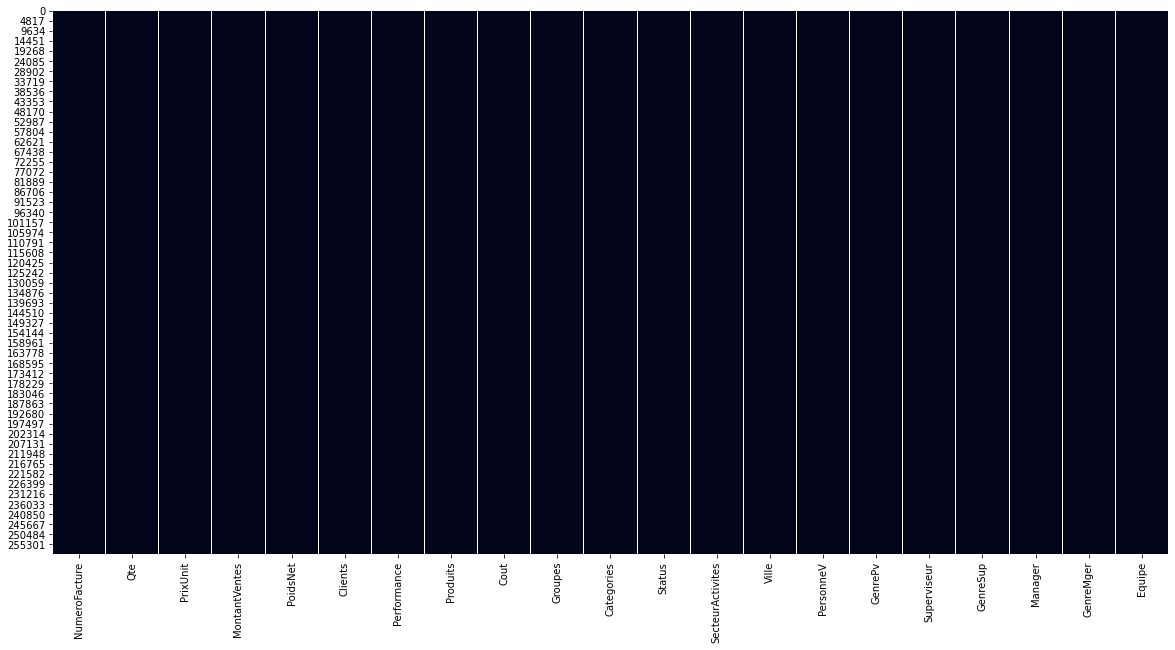

In [54]:
# Ce heatmap confirme qu'il n' y pas de valeur manquante dans les données
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

1.3.5.2  Analyse de Fond :

In [8]:
df["Performance"].value_counts(normalize = True)*100  #f["Target"].value_counts()

Bon        55.089275
Median     38.423505
Mauvais     6.487220
Name: Performance, dtype: float64

Histogramme des variables continues

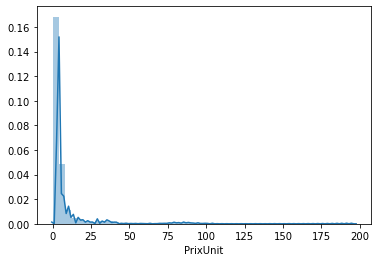

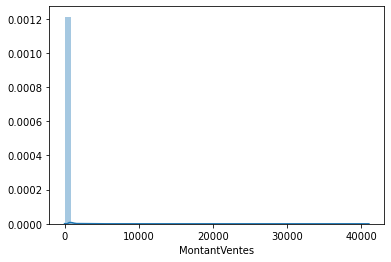

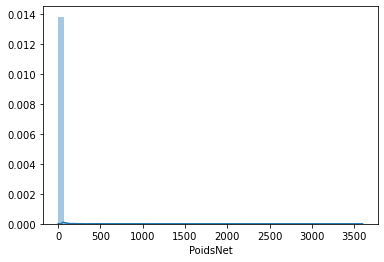

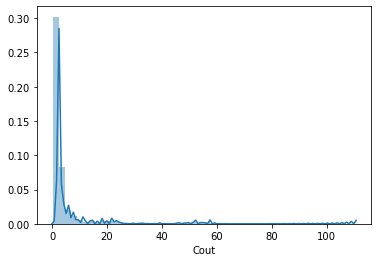

In [56]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

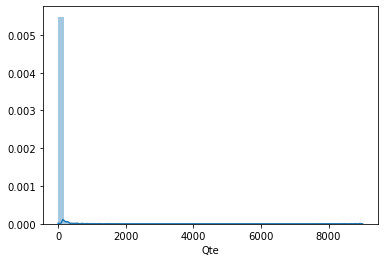

In [57]:
#Pour la variable qte
sns.distplot(df["Qte"])

Variables qualitatives¶

In [58]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50}: {df[col].nunique()}')

NumeroFacture-------------------------------------: 52560
Clients-------------------------------------------: 1272
Performance---------------------------------------: 3
Produits------------------------------------------: 798
Groupes-------------------------------------------: 23
Categories----------------------------------------: 2
Status--------------------------------------------: 2
SecteurActivites----------------------------------: 22
Ville---------------------------------------------: 26
PersonneV-----------------------------------------: 12
GenrePv-------------------------------------------: 2
Superviseur---------------------------------------: 5
GenreSup------------------------------------------: 2
Manager-------------------------------------------: 2
GenreMger-----------------------------------------: 2
Equipe--------------------------------------------: 3


1.3.5.3  Relation Target et variables

In [59]:
bon_df = df[df["Performance"] == "Bon"]
median_df = df[df["Performance"] == "Median"]
mauvais_df = df[df["Performance"] == "Mauvais"]

In [60]:
quantitatives_df = df[['Qte', 'PrixUnit', 'MontantVentes','PoidsNet', 'Cout']]
qualitatives_df = df[['NumeroFacture', 'Produits', 'Groupes', 'Categories', 'Status',
       'SecteurActivites', 'Ville', 'PersonneV', 'GenrePv', 'Superviseur',
       'GenreSup', 'Manager', 'GenreMger', 'Equipe']]

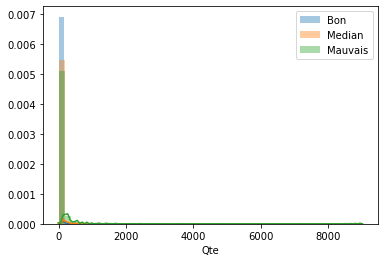

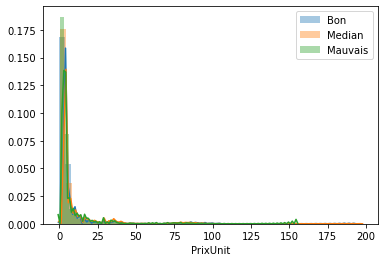

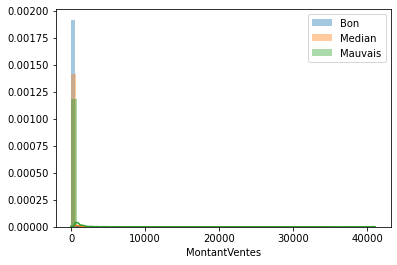

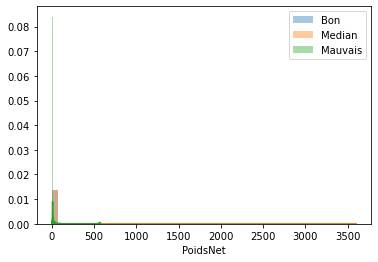

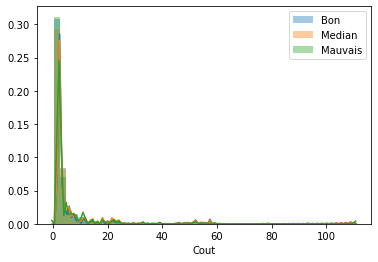

In [61]:
for col in  quantitatives_df:
    plt.figure()
    sns.distplot(bon_df[col], label = "Bon")
    sns.distplot(median_df[col], label = "Median")
    sns.distplot(mauvais_df[col], label = "Mauvais")
    plt.legend()

## Developpement de piplines
### Chargement de pipelines dans **sklearn**

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
                            #justesse,      precision,      rappel,     f1score, matrice de confusion

### Classer les données en features et en target

In [13]:
X = df.drop("Performance", axis=1)
y = df["Performance"]

### Encoder la target

In [14]:
transform = LabelEncoder()
y = transform.fit_transform(y)

### Scinder les deux goupes de données en:
- **données d'entraiment: 70%** 
- **données de validation: 30%**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 345)

### Créer une variable contenant les noms de colonnes des valiables quantitatives et une 
### variable contenant les noms de colonnes des variables qualitatives

### Creer deux pipelines contenant des transformers pour chacune des deux categories de variables crées pour les normalisées  et encodées

### Créer un transformer contenant les deux premiers pipelines

In [16]:
numerical_var = ['Qte', 'PrixUnit', 'MontantVentes','PoidsNet', 'Cout']
categorical_var = ['NumeroFacture', 'Produits', 'Groupes', 'Categories', 'Status',
       'SecteurActivites', 'Ville', 'PersonneV', 'GenrePv', 'Superviseur',
       'GenreSup', 'Manager', 'GenreMger', 'Equipe']

In [17]:
numerical_pipeline = make_pipeline(StandardScaler())

In [18]:
categorila_pipeline = make_pipeline(OneHotEncoder())

In [19]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_var), 
                                       (categorila_pipeline, categorical_var))

In [20]:
preprocessor.fit_transform

<bound method ColumnTransformer.fit_transform of ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Qte', 'PrixUnit', 'MontantVentes',
                                  'PoidsNet', 'Cout']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['NumeroFacture', 'Produits', 'Groupes',
                                  'Categories', 'Status', 'SecteurActivites',
                                  'Ville', 'PersonneV', 'GenrePv',
                                  'Superviseur', 'GenreSup', 'Manager',
                                  'GenreMger', 'Equipe'])])>

### Créer une pipeline contenant le transformer complet et differents estimaters

In [ ]:
# les differents models à tester
#KNN = make_pipeline(preprocessor, KNeighborsClassifier())
SGDC = make_pipeline(preprocessor, SGDClassifier())
RandomForest = make_pipeline(preprocessor, RandomForestClassifier())
#Adaboost = make_pipeline(preprocessor, AdaboostClassifier())
SVM = make_pipeline(preprocessor, SVC())

In [ ]:
dic_des_models = {
    'SGDC': SGDC,
    'RandomForest': RandomForest,
    #'KNN': KNN,
    #'Adaboost': Adaboost,
    'SVM': SVM
}

### SGDClassifier est le seul qui semble marcher

In [21]:
model = make_pipeline(preprocessor, 
              SGDClassifier())

### Entrainer notre model avec les données d'entrainement

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Qte', 'PrixUnit',
                                                   'MontantVentes', 'PoidsNet',
                                                   'Cout']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['NumeroFacture', 'Produits',
                                                   'Groupes', 'Categories',
                                                   'Status', 'SecteurActivites',
                                          

### Score du model à l'entrainement

In [24]:
model.score(X_train, y_train)

0.7965034849808038

### preprocessing des données de validation avec le même transformer complet

In [25]:
X_test = preprocessor.fit_transform(X_test)

In [26]:
y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

C:\Users\Hamaya\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


ValueError: Specifying the columns using strings is only supported for pandas DataFrames